<a href="https://colab.research.google.com/github/ucheokechukwu/zero_to_mastery_courses/blob/main/Pytorch_For_Deep_Learning%5C03_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.learnpytorch.io/03_pytorch_computer_vision/



# Computer vision libraries in Pytorch

1. `Torchvision` - https://pytorch.org/vision/stable/index.html
2. `torchvision.datasets` - get datasets and data loading functions for computer vision
3. `torchvision.models` - pretrained computer vision models that can be leveraged.
4. `torchvision.transforms` - functions for manipulating vision data to be suitable for use with an ML model
5. `torch.utils.data.Dataset`  - for creating our dataset with the base dataset for PyTorch
6. `torch.utils.data.DataLoader` - creates a python iterable over a dataset

In [ ]:
import torch
from torch import nn

import torchvision
from torchvision import datasets, transforms
from torchvision.transforms import ToTensor

from matplotlib import pyplot as plt
print(torch.__version__, torchvision.__version__)

2.0.1+cu118 0.15.2+cu118


In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)

cuda


# 1. Data

## 1.1 Getting a dataset
- Fashion MNIST from torchvision.datasets
https://pytorch.org/vision/stable/generated/torchvision.datasets.FashionMNIST.html#torchvision.datasets.FashionMNIST

In [ ]:
# set up training daat
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root='data', # where to download the data
    train = True,
    transform = ToTensor(), # transform the data?
    target_transform = None, # transform labels?
    download = True
)
test_data = datasets.FashionMNIST(
    root='data',
    train = False,
    transform=ToTensor(),
    target_transform=None,
    download=True
)

100%|██████████| 26421880/26421880 [00:02<00:00, 10478184.48it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 173388.50it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 3338169.97it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 7664990.06it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [ ]:
len(train_data), len(test_data), type(train_data)

(60000, 10000, torchvision.datasets.mnist.FashionMNIST)

In [ ]:
# see the first traiing example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [ ]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [ ]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [ ]:
train_data.targets, len(train_data.targets)

(tensor([9, 0, 0,  ..., 3, 0, 5]), 60000)

In [ ]:
image.shape, label

(torch.Size([1, 28, 28]), 9)

In [ ]:
print(f"Print image shape: {image.shape} -> [color_channels, height, width]")
print(f"Image label: {class_names[label]}")

Print image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


## 1.2 Visualizing our data

Image shape is torch.Size([1, 28, 28])


Text(0.5, 1.0, 'Ankle boot')

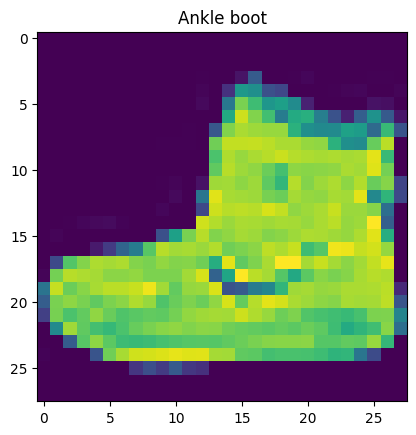

In [ ]:
import matplotlib.pyplot as plt
image, label  = train_data[0]
print(f"Image shape is {image.shape}")
plt.imshow(image.squeeze())
plt.title(class_names[label])

(-0.5, 27.5, 27.5, -0.5)

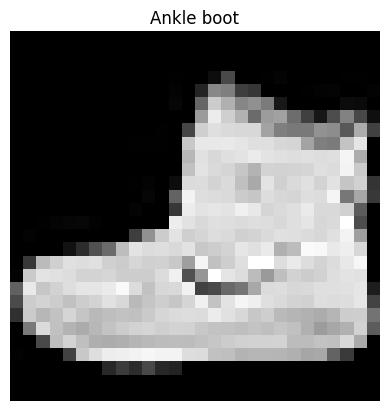

In [ ]:
plt.imshow(image.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)

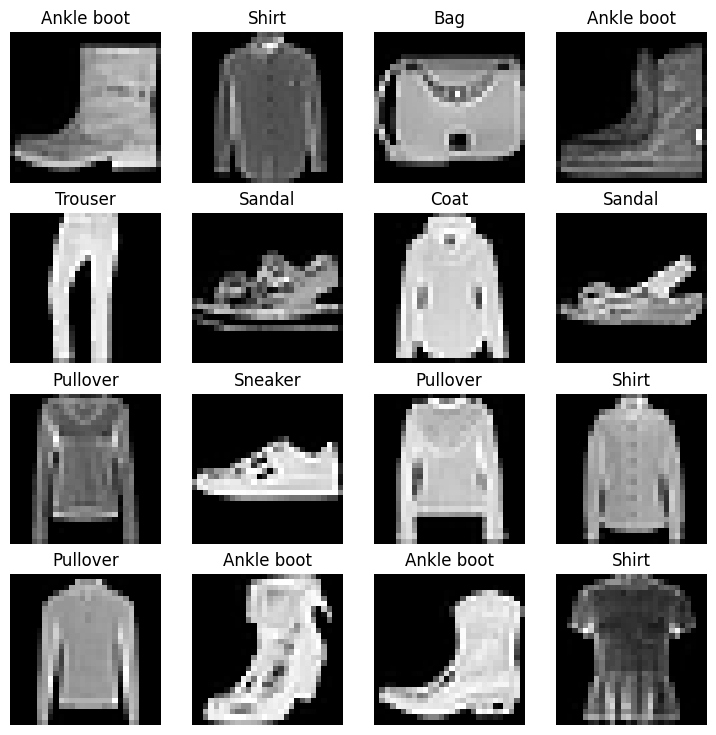

In [ ]:
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4, 4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(0,len(train_data), size=[1]).item()

    image, label = train_data[random_idx]
    fig.add_subplot(rows,cols,i)
    plt.imshow(image.squeeze(), cmap='gray')
    plt.title(class_names[label])
    plt.axis(False)

## 2. Prepare dataloader

Right now, our data is in the form of Pytorch datasets.
We want to convert them from datasets to a **dataloder**. Remember dataloaders turn datasets into pytorch iterable. More specifically, we want to turn our data into mini**batches**. Why?

1. it is more computationally efficient i.e. computing hardware may not be able to look (store in memory) at 60K images per hit. so we break it down to 32 images at a time.

2. it gives neural network more chances to update its gradients per epoch.

https://www.youtube.com/watch?v=4qJaSmvhxi8

https://pytorch.org/docs/stable/data.html

In [ ]:
from torch.utils.data import DataLoader

# set up the batch size hyperparameter
BATCH_SIZE = 32

# turn datasets into iterables (batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)
test_dataloader = DataLoader(dataset=test_data,
                              batch_size=BATCH_SIZE,
                              shuffle=False)

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7c93a06a92a0>,
 <torch.utils.data.dataloader.DataLoader at 0x7c93a08977f0>)

In [ ]:
# check out what we've created
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x7c93a06a92a0>, <torch.utils.data.dataloader.DataLoader object at 0x7c93a08977f0>)
Length of the train_dataloader: 1875 batches of 32
Length of the test_dataloader: 313 batches of 32


In [ ]:
# check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))

train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

In [ ]:
len(train_features_batch)

32

image size: torch.Size([1, 28, 28])
label: 8, label size: torch.Size([])


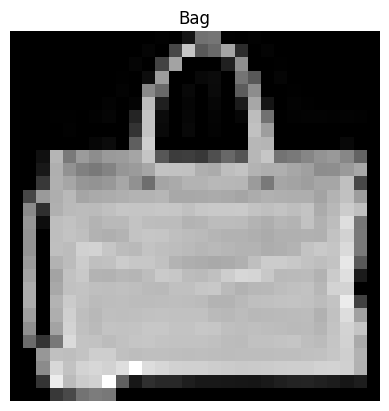

In [ ]:
# show a sample
# torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(class_names[label])
plt.axis(False)
print(f"image size: {img.shape}")
print(f"label: {label}, label size: {label.shape}")

# Model building

## Model 0: Build a baseline model

A baseline model is a simple model that you will try to improve upon with subsequent experiments. Start simply, then add complexity when necessary.

In [ ]:
# create a flatten layer
flatten_model = nn.Flatten()

# get a single sample
x = train_features_batch[0]
print(f"Shape before flattening: {x.shape} -> [color channels, height, width]")
# flatten the sample
output = flatten_model(x) # perform forward pass
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

Shape before flattening: torch.Size([1, 28, 28]) -> [color channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [ ]:
from torch import nn
class FashionMnistModelV0(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
    def forward(self, x):
        return self.layer_stack(x)


In [ ]:
torch.manual_seed(88)

model_0 = FashionMnistModelV0(
    input_shape = 28*28,
    hidden_units = 10,
    output_shape = len(class_names)).to(device) # length of class names
model_0 = model_0.to(device)


In [ ]:
dummy_x = torch.rand([1,1,28,28]).to(device)
model_0(dummy_x).shape
# notice how the shape changes if you don't flatten it?

torch.Size([1, 10])

In [ ]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 1.9505e-02,  1.3839e-02,  2.3594e-02,  ..., -2.4597e-02,
                        3.3790e-02, -2.4704e-03],
                      [ 6.1313e-03,  2.6851e-02, -1.5784e-03,  ..., -7.8577e-03,
                       -3.4669e-02,  3.2368e-02],
                      [-2.6674e-02, -6.6836e-03,  6.3991e-03,  ...,  3.5664e-02,
                        6.5224e-03, -2.6120e-02],
                      ...,
                      [ 3.4021e-02, -2.6375e-02, -1.6709e-02,  ..., -2.5281e-02,
                        8.2293e-05, -1.5344e-02],
                      [ 2.8409e-02, -7.0254e-03, -2.2896e-02,  ...,  1.3499e-02,
                        3.9861e-03,  1.1276e-02],
                      [-2.8039e-02, -1.2085e-02, -2.4942e-02,  ..., -2.0929e-02,
                        4.6583e-03, -1.6992e-03]], device='cuda:0')),
             ('layer_stack.1.bias',
              tensor([-0.0052, -0.0040,  0.0355,  0.0232, -0.0189,  0.0299, -0.0067, -0.0355,

### set up loss, optimizer, and evaluation metrics

loss function - `nn.CrossEntropyLoss()`

optimizer - `torch.optim.SGD()`

evaluation metric - `accuracy`

In [ ]:
import requests
from pathlib import Path

# download helper functions from Learn Pytorch repo

if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download...")
else:
    print("Downloading helper_functions.py")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py", 'wb') as f:
        f.write(request.content)

In [ ]:
from helper_functions import accuracy_fn

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_0.parameters(),
                            lr=0.1)


### creating a function to time our experiments

ML is very experimental. two of the main things you'll want to track:

1. model's performance (loss and accuracy)
2. its speed

there's often a trade off between these two.

In [ ]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):

    """print difference between start and end time"""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")

    return total_time

### creating a training loop and training a model on batches of data

1. loop through epochs
2. loop throuigh training batches, perform training steps, calculate the train loss *per batch*
3. loop through testing batches, perform testing steps, calculate the test loss per batch
4. print out what's happening
5. time it all

In [ ]:
from tqdm.auto import tqdm

# set the seed and start timer
torch.manual_seed(88)
train_time_start_on_cpu = timer()

# set the number of epochs (keep it small for faster training time)
epochs =  3

# create training and test loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------")

    ## Training
    train_loss = 0
    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader):
        X, y = X.to(device), y.to(device)
        model_0.train()
        # 1. forward pass
        y_pred = model_0(X)

        # 2. calculate the loss
        loss = loss_fn(y_pred, y)
        train_loss += loss #

        # 3. optimize zero grad
        optimizer.zero_grad()

        # 4. loss backwards
        loss.backward()

        # 5. gradient descent/optimize weights
        optimizer.step()

        # print out what's happening
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)}","/",f"{len(train_dataloader.dataset)} samples")

    # average training loss per batch
    train_loss /=len(train_dataloader)


    ### Testing loop
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:

            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. forward pass
            test_pred = model_0(X_test)

            # 2. calculate loss and accuracy (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true= y_test,
                                    y_pred = test_pred.argmax(dim=1))

        # calculate the test loss/accuracy average per batch
        test_loss /= len(test_dataloader)
        test_acc /=len(test_dataloader)

    # print out what's happening
    print(f"\nTrain loss: {train_loss:.4f}, Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}")


# calculate the training time

train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.5908, Test loss: 0.5027, Test accuracy: 82.2484
Epoch: 1
------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4734, Test loss: 0.4945, Test accuracy: 82.9573
Epoch: 2
------------
Looked at 0 / 60000 samples
Looked at 12800 / 60000 samples
Looked at 25600 / 60000 samples
Looked at 38400 / 60000 samples
Looked at 51200 / 60000 samples

Train loss: 0.4524, Test loss: 0.4764, Test accuracy: 83.3367
Train time on cuda:0: 27.500 seconds


### Make predictions and get Model 0 results

In [ ]:
torch.manual_seed(88)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
    """Returns a dictionary containing the results of model predicting on data_loader"""

    loss, acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X, y in tqdm(data_loader):
            X, y = X.to(device), y.to(device)
            # make predictions
            y_pred = model(X)
            # accumulate the loss and accuracy values per batch
            loss += loss_fn(y_pred, y)
            acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))
        # scale loss and accuracy to find the average per batch

        loss /=len(data_loader)
        acc /=len(data_loader)
    return {"model_name": model.__class__.__name__, # this only works if the model was created with a class
            "model_loss": loss.item(),
            "model_acc": acc}


# calculate model 0 results on test dataset

model_0_results = eval_model(model = model_0,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMnistModelV0',
 'model_loss': 0.4763748049736023,
 'model_acc': 83.33666134185303}

## Model 1 - Model with non-linearity

In [ ]:
class FashionMNistModelV1(nn.Module):
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape),
            nn.ReLU()
        )
    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.layer_stack(x)


In [ ]:
next(model_0.parameters()).device

device(type='cuda', index=0)

In [ ]:
# create an instance of model_1
torch.manual_seed(88)
model_1 = FashionMNistModelV1(input_shape = 784,
                              hidden_units=10,
                              output_shape = len(class_names)).to(device)
next(model_1.parameters()), next(model_1.parameters()).device

(Parameter containing:
 tensor([[ 1.9505e-02,  1.3839e-02,  2.3594e-02,  ..., -2.4597e-02,
           3.3790e-02, -2.4704e-03],
         [ 6.1313e-03,  2.6851e-02, -1.5784e-03,  ..., -7.8577e-03,
          -3.4669e-02,  3.2368e-02],
         [-2.6674e-02, -6.6836e-03,  6.3991e-03,  ...,  3.5664e-02,
           6.5224e-03, -2.6120e-02],
         ...,
         [ 3.4021e-02, -2.6375e-02, -1.6709e-02,  ..., -2.5281e-02,
           8.2293e-05, -1.5344e-02],
         [ 2.8409e-02, -7.0254e-03, -2.2896e-02,  ...,  1.3499e-02,
           3.9861e-03,  1.1276e-02],
         [-2.8039e-02, -1.2085e-02, -2.4942e-02,  ..., -2.0929e-02,
           4.6583e-03, -1.6992e-03]], device='cuda:0', requires_grad=True),
 device(type='cuda', index=0))

### set up loss, optimizer and evaluation metrics

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_1.parameters(), lr = 0.1)

from helper_functions import accuracy_fn

### create a function for the training and testing loops

- training loop = `train_step()`
- testing loop = `test_step()`

In [ ]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device: torch.device =device):
    "Performs a trianing step with model trying to learn on dataloader"
    from tqdm.auto import tqdm

    # set the seed and start timer
    torch.manual_seed(88)
    train_loss, train_acc = 0, 0

    # put model in training mode
    model.train()



    # add a loop to loop through the training batches
    for batch, (X,y) in enumerate(dataloader):
        # put data on target device
        X, y = X.to(device), y.to(device)

        # 1. forward pass
        y_pred = model(X)

        # 2. calculate the loss and accuracy
        loss = loss_fn(y_pred, y)
        train_loss += loss #
        acc = accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))
        train_acc += acc

        # 3. optimize zero grad
        optimizer.zero_grad()

        # 4. loss backwards
        loss.backward()

        # 5. gradient descent/optimize weights
        optimizer.step()

    # average training loss and accuracy per batch
    train_loss /=len(dataloader)
    train_acc /=len(dataloader)

    # print out what's happening
    print(f"Train loss:  {train_loss:.5f} and Train accuracy: {train_acc:5f}")



def test_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module = loss_fn,
               accuracy_fn=accuracy_fn,
               device: torch.device =device):
    """Performs a testing loop step on model going over dataloader"""


    ### Testing loop
    test_loss, test_acc = 0, 0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in dataloader:
            # put data on target device
            X_test, y_test = X_test.to(device), y_test.to(device)
            # 1. forward pass
            test_pred = model(X_test)

            # 2. calculate loss and accuracy (accumulatively)
            test_loss += loss_fn(test_pred, y_test)
            test_acc += accuracy_fn(y_true= y_test,
                                    y_pred = test_pred.argmax(dim=1))

        # calculate the test loss/accuracy average per batch
        test_loss /= len(dataloader)
        test_acc /=len(dataloader)

    # print out what's happening
    print(f"Test loss: {test_loss:.4f}, Test accuracy: {test_acc:.4f}\n")








In [ ]:
train_time_start = timer()
epochs = 3
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n------------")
    train_step(model=model_1,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               accuracy_fn=accuracy_fn,
               optimizer=optimizer,
               device=device)
    test_step(model=model_1,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_stop = timer()
total_train_time_model_1 = print_train_time(start=train_time_start,
                                           end=train_time_stop,
                                           device=str(next(model_1.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
------------
Train loss:  1.42553 and Train accuracy: 48.021667

Train loss: 0.4524, Test loss: 1.3601, Test accuracy: 48.8918
Epoch: 1
------------
Train loss:  1.31509 and Train accuracy: 50.293333

Train loss: 0.4524, Test loss: 1.3218, Test accuracy: 49.6306
Epoch: 2
------------
Train loss:  1.28822 and Train accuracy: 50.876667

Train loss: 0.4524, Test loss: 1.3102, Test accuracy: 50.1697
Train time on cuda:0: 28.734 seconds


### Evaluating model 1

In [ ]:
model_1_results = eval_model(model=model_1, data_loader=test_dataloader,
    loss_fn=loss_fn, accuracy_fn=accuracy_fn,
    device=device
)
model_0_results, model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMnistModelV0',
  'model_loss': 0.4763748049736023,
  'model_acc': 83.33666134185303},
 {'model_name': 'FashionMNistModelV1',
  'model_loss': 1.3101552724838257,
  'model_acc': 50.16972843450479})

## Model 2 (CNN)

https://poloclub.github.io/cnn-explainer/

In [ ]:
class FashionMNistModelV2(nn.Module):
    """replicate the model architecture of TinyVGG from CNN explainer website"""
    def __init__(self,
                 input_shape: int,
                 hidden_units: int,
                 output_shape: int):
        super().__init__()
        self.conv_block_1 = nn.Sequential(
            nn.Conv2d(in_channels=input_shape,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.conv_block_2 = nn.Sequential(
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=hidden_units,
                      out_channels=hidden_units,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=hidden_units*7*7,
                      out_features=output_shape)
            )


    def forward(self, x:torch.Tensor) -> torch.Tensor:
        # print(x.shape)
        x = self.conv_block_1(x)
        # print(x.shape)
        x = self.conv_block_2(x)
        # print(x.shape)
        x = self.classifier(x)
        # print(x.shape)
        return x
torch.manual_seed(0)

model_2 = FashionMNistModelV2(input_shape=1, # number of channels
                              hidden_units=10,
                              output_shape=10).to(device)
model_2

FashionMNistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

### Stepping through `nn.Conv2d()`

- https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html

In [ ]:
torch.manual_seed(42)
# create a batch of images
images = torch.randn(size=(32, 3, 64, 64))

test_image = images[0]

print(f"Image batch shape: {images.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n{test_image}")

Image batch shape: torch.Size([32, 3, 64, 64])
Single image shape: torch.Size([3, 64, 64])
Test image: 
tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0

In [ ]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[-0.0025,  0.1788, -0.2743],
                        [-0.2453, -0.1284,  0.0894],
                        [-0.0066,  0.2643, -0.0296]]],
              
              
                      [[[ 0.0882, -0.1007, -0.0655],
                        [-0.3184, -0.2208, -0.1374],
                        [ 0.0123,  0.1318,  0.2000]]],
              
              
                      [[[-0.2260, -0.1452,  0.1211],
                        [ 0.2768, -0.0686,  0.2494],
                        [-0.0537,  0.0353,  0.3018]]],
              
              
                      [[[-0.3092, -0.2098, -0.0844],
                        [-0.1299,  0.2880, -0.2161],
                        [-0.1534, -0.2329, -0.3122]]],
              
              
                      [[[-0.1946,  0.2865,  0.1487],
                        [ 0.1616,  0.0175, -0.1709],
                        [ 0.0564, -0.3112, -0.2409]]],
              
              
      

In [ ]:
# create a single conv2d layer
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=3,
                       padding=1)
conv_output = conv_layer(test_image)
conv_output.shape

torch.Size([10, 64, 64])

### Stepping through `nn.MaxPool2d`
- https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html


In [ ]:
print(f"test image original shape: {test_image.shape}")
print(f"test image with unsqueezed dimension: {test_image.unsqueeze(0).shape}")

# create a sample nn.MaxPool2D layer
max_pool_layer = nn.MaxPool2d(kernel_size=2)

# pass data through just the convolution layer
test_image_through_conv = conv_layer(test_image)

print(f"Shape after convolution: {test_image_through_conv.shape}")

# pass data through the maxpool layer
test_image_through_conv_and_pool = max_pool_layer(test_image_through_conv)
print(f"Shape after MaxPooling: {test_image_through_conv_and_pool.shape}")

test image original shape: torch.Size([3, 64, 64])
test image with unsqueezed dimension: torch.Size([1, 3, 64, 64])
Shape after convolution: torch.Size([10, 64, 64])
Shape after MaxPooling: torch.Size([10, 32, 32])


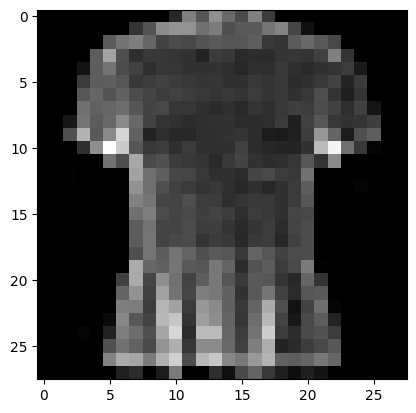

In [ ]:
plt.imshow(image.squeeze(0),cmap='gray')

In [ ]:
rand_image_tensor = torch.randn(size=image.shape).to(device)
model_2(rand_image_tensor.unsqueeze(0))

tensor([[ 0.1163, -0.0724,  0.0176, -0.0434, -0.0484, -0.0267,  0.0132,  0.0114,
         -0.0145,  0.0193]], device='cuda:0', grad_fn=<AddmmBackward0>)

### setting up a loss function and optimizer

In [ ]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_2.parameters(),lr=0.1)
from helper_functions import accuracy_fn

### training and testing model_2 using our functions

In [ ]:
torch.manual_seed(88)
torch.cuda.manual_seed(88)

# measure time
train_time_start = timer()

# train and test model
epochs=3
for epoch in tqdm(range(epochs)):
    train_step(model=model_2,
               dataloader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               accuracy_fn=accuracy_fn,
               device=device)
    test_step(model=model_2,
              dataloader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_stop = timer()

total_train_time_model_2 = print_train_time(start = train_time_start,
                     end = train_time_stop,
                     device = device)


  0%|          | 0/3 [00:00<?, ?it/s]

Train loss:  0.58066 and Train accuracy: 78.943333
Test loss: 0.3828, Test accuracy: 85.9724

Train loss:  0.35171 and Train accuracy: 87.405000
Test loss: 0.3423, Test accuracy: 87.8494

Train loss:  0.31945 and Train accuracy: 88.530000
Test loss: 0.3200, Test accuracy: 88.3586

Train time on cuda: 34.003 seconds


In [ ]:
model_2_results = eval_model(model=model_2,
                             data_loader = test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)
model_0_results, model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

({'model_name': 'FashionMnistModelV0',
  'model_loss': 0.4763748049736023,
  'model_acc': 83.33666134185303},
 {'model_name': 'FashionMNistModelV2',
  'model_loss': 0.320041298866272,
  'model_acc': 88.35862619808307})

# Comparing Model Results and Training Time

In [ ]:
import pandas as pd
compare_results = pd.DataFrame([model_0_results,
                                model_1_results,
                                model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMnistModelV0,0.476375,83.336661
1,FashionMNistModelV1,1.310155,50.169728
2,FashionMNistModelV2,0.320041,88.358626


In [ ]:
# adding training time
compare_results['training_time'] = [total_train_time_model_0,
                                    total_train_time_model_1,
                                    total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMnistModelV0,0.476375,83.336661,27.499503
1,FashionMNistModelV1,1.310155,50.169728,28.734042
2,FashionMNistModelV2,0.320041,88.358626,34.003062


Text(0, 0.5, 'model')

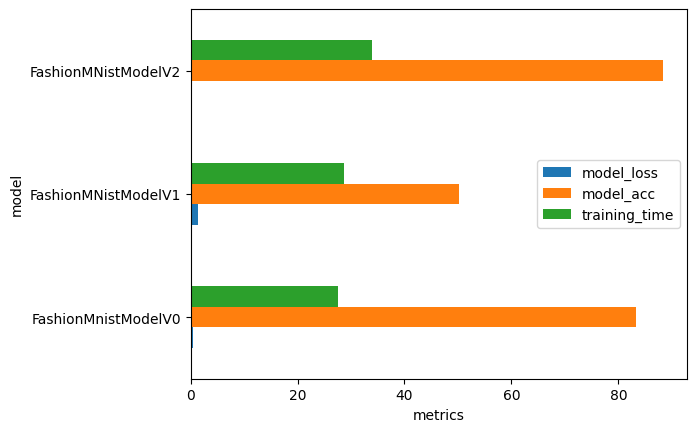

In [ ]:
# Visualie our model resulst
compare_results.set_index('model_name').plot(kind='barh')
plt.xlabel('metrics')
plt.ylabel('model')

## Make and Evaluate Random Predictions with best models

In [ ]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
    pred_probs = []
    model.to(device) # to be sure it's on the same device
    model.eval()
    with torch.inference_mode():
        for sample in data:
            # prepare the sample
            sample = torch.unsqueeze(sample, dim=0).to(device) # unsqueeze to add a batch dimension

            # forward pass (model outputs raw logits)
            pred_logit = model(sample)
            # prediction probability
            pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)
            # get pred_prob off GPU for further calculations (matplotlib does not work wtih cuda)

            pred_probs.append(pred_prob.cpu())

    # stack the pred probs to turn list into a tensor

    return torch.stack(pred_probs)

In [ ]:
img, label = test_data[0][:10]
img.shape, label

(torch.Size([1, 28, 28]), 9)

torch.Size([1, 28, 28])

Text(0.5, 1.0, '5: Sandal')

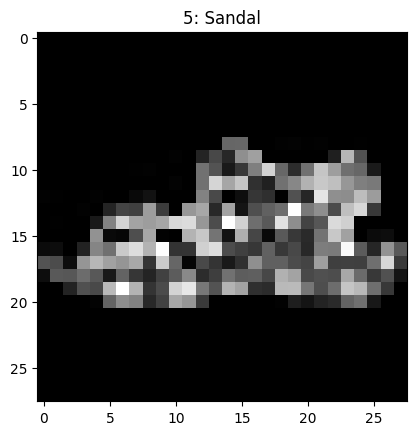

In [ ]:
import random
# random.seed(42)
test_samples = []
test_labels = []
for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)

# view the first sample shape
display(test_samples[0].shape)

plt.imshow(test_samples[0].squeeze(), cmap='gray')
plt.title(str(test_labels[0]) +': ' + class_names[test_labels[0]])

In [ ]:
pred_probs = make_predictions(model=model_2, data=test_samples)

# view the first 2 prediction probabilities
pred_probs[:2]

tensor([[1.0276e-06, 4.9109e-08, 3.8003e-08, 3.6726e-07, 1.0597e-06, 9.9994e-01,
         1.5482e-05, 9.0622e-06, 3.3272e-05, 1.1242e-06],
        [1.1575e-03, 2.9094e-07, 1.5787e-02, 1.1389e-04, 2.8162e-02, 1.0140e-07,
         9.5477e-01, 1.4587e-08, 3.8813e-06, 6.1568e-07]])

In [ ]:
# convert prediction probabilities to labels
pred_classes = pred_probs.argmax(1)
pred_classes, test_labels

(tensor([5, 6, 6, 4, 3, 1, 2, 3, 6]), [5, 6, 6, 4, 3, 1, 4, 6, 6])

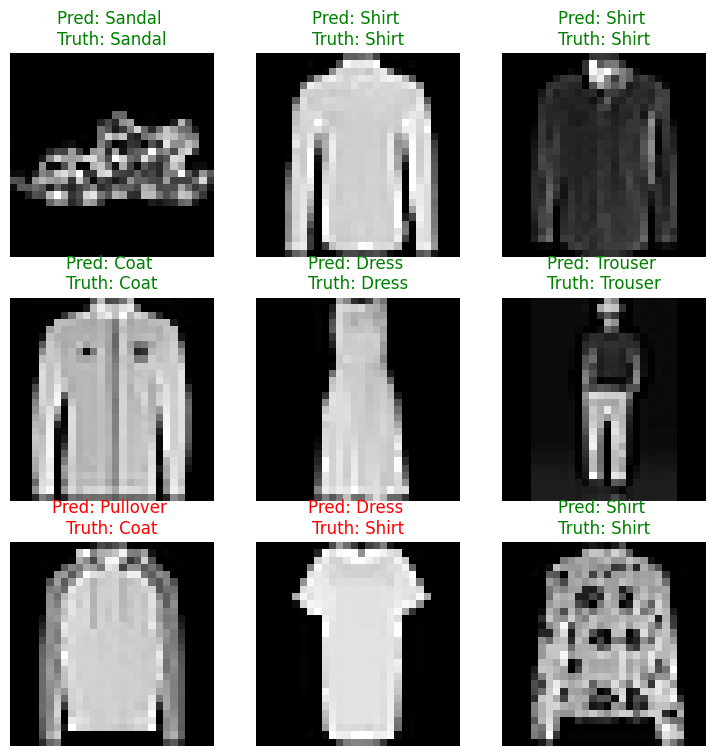

In [ ]:
# plot predictions
plt.figure(figsize=(9,9))
nrows = ncols = 3
for i, sample in enumerate(test_samples):
    # create subplot
    plt.subplot(nrows,ncols, i+1)
    # plot the target image
    plt.imshow(sample.squeeze(), cmap='gray')
    # find the prediction label in text form
    pred_label = class_names[pred_classes[i]]
    # get the truth label (in text form)
    truth_label = class_names[test_labels[i]]

    # create a title for the plot
    title_text = f"Pred: {pred_label} \nTruth: {truth_label}"
    # check for equality between pred and truth and show in color of title text
    if pred_label == truth_label:
        plt.title(title_text, c='g')
    else:
        plt.title(title_text, c='r')
    plt.axis(False)
    # plt.tight_layout()


## Making a confusion matrix for further model evaluation

`torchmetrics.ConfusionMatrix`

`mlxtend.plotting.plot_confusion_matrix()`

https://rasbt.github.io/mlxtend/user_guide/plotting/plot_confusion_matrix/


In [ ]:
from tqdm.auto import tqdm

# make predictions
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X, y in tqdm(test_dataloader, desc = "Making predictions..."):
        X, y = X.to(device), y.to(device)
        y_logit = model_2(X)
        y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
        # put predictions on cpu for evaluation
        y_preds.append(y_pred.cpu())

# concantenate list of predictions into a tensor
print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor[:10], y_pred_tensor.shape

Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 3, 3, 4, 1, 2, 6, 8, 0, 2, 7, 7, 5,
        1, 6, 6, 3, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 6, 1, 3, 7, 4, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 3, 3, 3, 7, 8, 7, 0, 2, 6, 4, 3, 1, 2, 8, 4, 3, 8, 5, 9, 5, 0, 3, 2,
        0, 6, 5, 3, 6, 7, 1, 8]), tensor([6, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 9, 9, 4, 2, 5, 7, 6, 5, 2, 8, 4, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 6, 0, 0, 1, 6, 1, 3, 2, 2, 3, 4,
        1, 4, 5, 6, 4, 7, 9, 3]), tensor([7, 2, 8, 8, 0, 9, 2, 7, 4, 2, 6, 5, 6, 1, 2, 8, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 2, 8, 3, 6, 1, 1, 0, 2, 9, 2, 6, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 3, 2, 5, 3, 9, 2, 2, 8, 6, 4,
        6, 2, 9, 7, 3, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 2, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

(tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7]), torch.Size([10000]))

In [ ]:
try:
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")
    assert int(mlxtend.__version__.split(".")[1]) >=19, "mlxtend version should be 0.19.0 or higher"
except:
    !pip install -q torchmetrics -U mlxtend
    import torchmetrics, mlxtend
    print(f"mlxtend version: {mlxtend.__version__}")


mlxtend version: 0.22.0


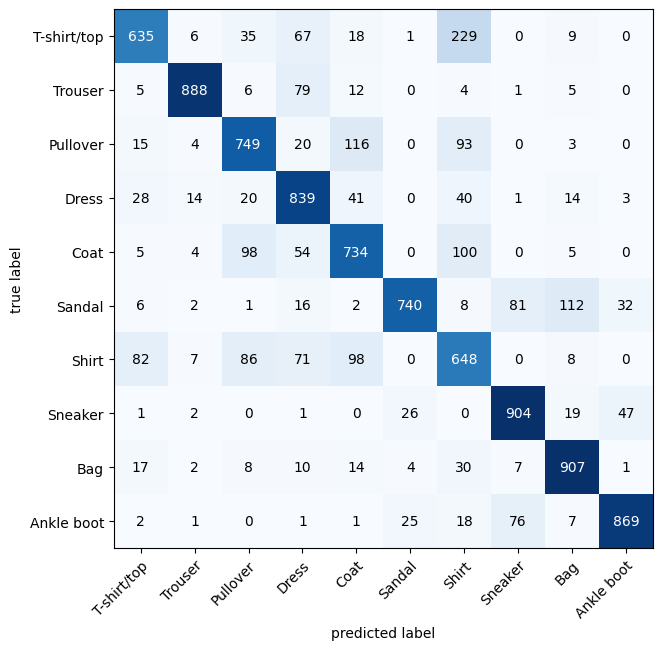

In [ ]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

confmat = ConfusionMatrix(num_classes = len(class_names),
                          task = 'multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target = test_data.targets)

# plot our confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat = confmat_tensor.numpy(), # matplotlib prefers to work with numpy
    class_names = class_names,
    figsize=(10,7)
)

In [ ]:
confmat_tensor

tensor([[635,   6,  35,  67,  18,   1, 229,   0,   9,   0],
        [  5, 888,   6,  79,  12,   0,   4,   1,   5,   0],
        [ 15,   4, 749,  20, 116,   0,  93,   0,   3,   0],
        [ 28,  14,  20, 839,  41,   0,  40,   1,  14,   3],
        [  5,   4,  98,  54, 734,   0, 100,   0,   5,   0],
        [  6,   2,   1,  16,   2, 740,   8,  81, 112,  32],
        [ 82,   7,  86,  71,  98,   0, 648,   0,   8,   0],
        [  1,   2,   0,   1,   0,  26,   0, 904,  19,  47],
        [ 17,   2,   8,  10,  14,   4,  30,   7, 907,   1],
        [  2,   1,   0,   1,   1,  25,  18,  76,   7, 869]])

# Saving and loading the best model

In [ ]:
## saving the model

from pathlib import Path
# create model directory path
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True,
                 exist_ok=True)

# create model save
MODEL_NAME = "03_pytorch_computer_vision_model_2.pt"
MODEL_SAVE_PATH = MODEL_PATH/MODEL_NAME

# save teh model state dict
print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), f=MODEL_SAVE_PATH)

Saving model to models/03_pytorch_computer_vision_model_2.pt


In [ ]:
## loading the model

# step 1 - create a new instance of the model
torch.manual_seed(88)
loaded_model_2 = FashionMNistModelV2(input_shape=1,
                                     hidden_units=10,
                                     output_shape=10)
# loading the model
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))
# send it to the target device
loaded_model_2.to(device)

FashionMNistModelV2(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [ ]:
model_2_results
torch.manual_seed(88)
loaded_model_2_results = eval_model(model=loaded_model_2,
                                    data_loader = test_dataloader,
                                    loss_fn = loss_fn,
                                    accuracy_fn = accuracy_fn)

  0%|          | 0/313 [00:00<?, ?it/s]

In [ ]:
torch.isclose(torch.tensor(model_2_results['model_loss']),
              torch.tensor(loaded_model_2_results['model_loss']),
              # atol = 1e-02 # setting tolerance
              )

tensor(True)